In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


# Processing the dataset

In [3]:
X_train=X_train/255
X_test=X_test/255

In [4]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

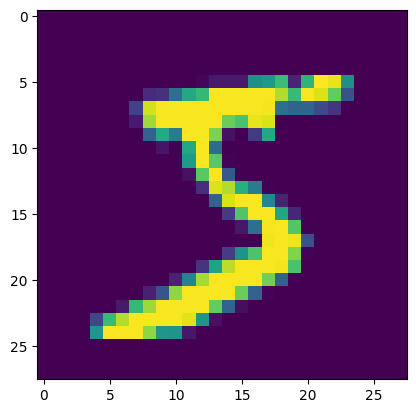

In [5]:
plt.imshow(X_train[0])

# Creating and Training a CNN (Convolution Neural Network)

In [6]:
model = Sequential([
    Convolution2D(filters=25,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Convolution2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Convolution2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 81s 40ms/step - loss: 0.2234 - accuracy: 0.9307
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0744 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0545 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0328 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0266 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 62s 33

# Making predictions

In [8]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 12ms/step - loss: 0.0500 - accuracy: 0.9881


[0.050027165561914444, 0.988099992275238]

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0500 - accuracy: 0.9881
Test accuracy: 0.988099992275238


In [10]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [11]:
y_predicted_classes = np.argmax(y_predicted, axis=1)

In [14]:
accuracy = accuracy_score(y_test, y_predicted_classes)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9881


In [15]:
y_predicted[0]

array([1.7986106e-10, 5.0807166e-08, 1.5245590e-07, 1.0418295e-07,
       1.4741302e-07, 2.1194661e-11, 8.8102838e-14, 9.9999869e-01,
       1.0120346e-09, 7.9516195e-07], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7